# Kombinované namáhání 2

Načtení potřebných knihoven:

In [1]:
%matplotlib inline
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from IPython.core.display import Image

Zavedení *LaTeX*ovského výpisu výsledků:

In [2]:
sp.init_printing()

### Zadání
Určete bezpečnost vhledem k meznímu stavu pružnosti u prutu podle obrázku, viz. obrázek.

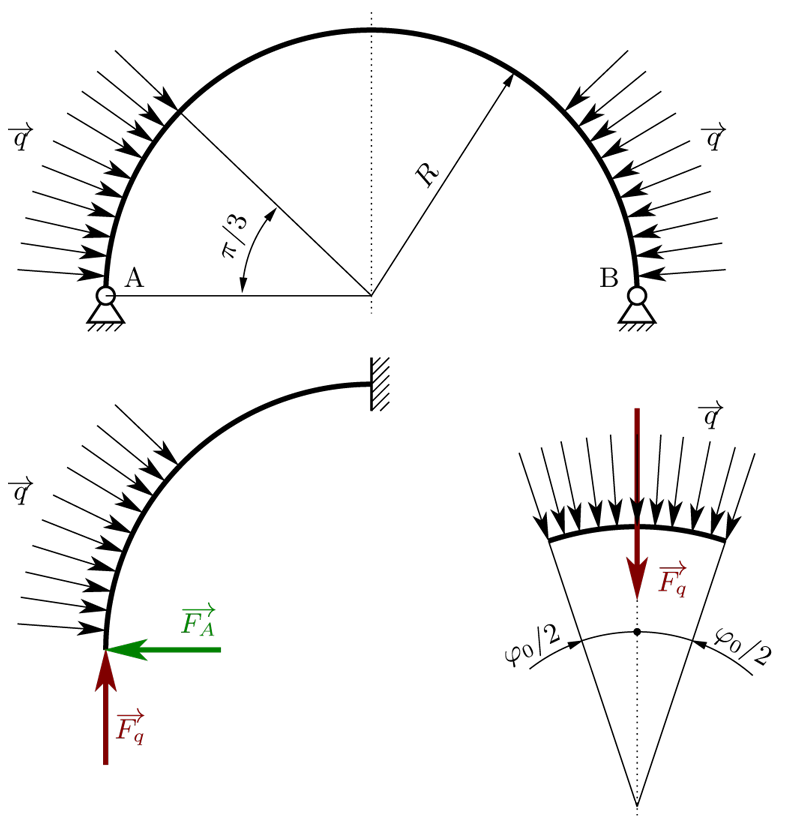

In [3]:
Image(filename='zakrivene_q1.png')

Předpokládá se obdelníkový příčný průřez $b\times h$, přičemž je dáno:
\begin{eqnarray}
  \sigma_{k}&=&350\,\mathrm{MPa},\\
  E&=&2.1\times10^{5}\,\mathrm{MPa},\\
  q&=&333\,\mathrm{N}\times\mathrm{mm}^{-1},\\
  R&=&350\,\mathrm{mm},\\
  h&=&50\,\mathrm{mm,}\\
  b&=&15\,\mathrm{mm}.
\end{eqnarray}

### Řešení:

*Poznámka*: Vnitřní účinky jsou zde řešeny diferencálním způsobem v křivočarých souřadnicích. Z praktického hlediska jde o velmi pracnou metodu, ikdyž její pochopení člověka jen obohatí. Proto je vhodné zde obdržené výsledné vnitřní účinky konfrontovat s integrálním přístupem.

*Úkol*: *Vyjádřete **standardně** integrálním způsobem níže vyjádřené výsledné vnitřní učinky*.

V řešení úlohy využijeme její symetrie. Úloha je $1\times$ staticky neurčitá a symetrická. Toho se využije tak, že se bude řešit jen levá část prutu jako vetknutý prut s částečným uvolněním podle obrázku výše, tj.

$$
  w_A=0.
$$

Nejdříve si zavedeme potředné proměnné:

In [4]:
T,N,M=sp.Function('T'),sp.Function('N'),sp.Function('M')
s,theta_1,theta_2,phi,phi0=sp.symbols(r's \theta_1 \theta_2 \varphi \varphi_0',real=True)
a,b,c=sp.symbols('a b c')
l=sp.symbols('s')
R=sp.symbols('R',real=True,positive=True)
p=sp.symbols('p')
q=sp.symbols('q',real=True)
E,J,S=sp.symbols('E J S')
C_1,C_2,D_1,D_2=sp.symbols('C_1 C_2 D_1 D_2',complex=True)
C_3,D_3=sp.symbols('C_3 D_3',real=True)
F_A,F,M_A=sp.symbols('F_A F M_A',real=True)

Diferenciální rovnice vnitřních účinků,

\begin{eqnarray}
  \frac{\mathrm{d}T(s)}{\mathrm{d}s}+\frac{N(s)}{R} &=& -q(s), \\
  \frac{\mathrm{d}N(s)}{\mathrm{d}s} &=& \frac{T(s)}{R}, \\
  \frac{\mathrm{d}M(s)}{\mathrm{d}s} &=& T(s),
\end{eqnarray}

kde $s$ je délka oblouku měřená ve směru hodinových ručiček (nemusí být nutně kruhový), $R$ je poloměr střednice prutu a $q(s)$ je liniové zatížení podél oblouku $s$. Hledáme řešení pro dva úseky. Na prvním úseku pro $s_1\in[0,\pi/3]$ platí nehomogenní tvar první rovnice, protože $q(s)=q=konst$. Na druhém úseku pro $s_2\in[0,\pi/6]$ platí homogenní tvar první rovnice, protože $q(s)=0$.

V *sympy* se předchozí rovnice mohou zapsat následovně,

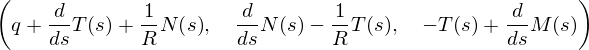

In [5]:
deqn1=T(s).diff(s)+q+N(s)/R
deqn2=N(s).diff(s)-T(s)/R
deqn3=M(s).diff(s)-T(s)
deqn1,deqn2,deqn3

 Derivováním druhé rovnice podle $s$ a její dosazení do rovnice první se dostane obyčejná diferemciální rovnice druhého řádu pro normálovou složku $N(s)$,

\begin{equation}
  R\frac{\mathrm{d}^{2}N(s)}{\mathrm{d}s^{2}}+\frac{N(s)}{R}=-q(s).
\end{equation}

*Sympy* ji také umí spočítat,

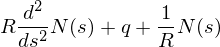

In [6]:
deqn2s=deqn2.diff(s)
sol1=sp.solve(deqn2s,T(s).diff(s))
deqn10=deqn1.subs(T(s).diff(s),sol1[0])
deqn10

Pro úsek $s_1\in[0,\pi/3]$ se řešení se hledá ve tvaru,

\begin{equation}
  N(s_1)=\hat{N}(s_1)+\tilde{N}(s_1),
\end{equation}

kde $\hat{N}(s)$ je homogenní řešení a $\tilde{N}(s)$ je partikulární řešení. Homogenní řešení se hledá ve tvaru,

$$
  \hat{N}(s)=\mathrm{e}^{ps},
$$

kde $p$ je obecně komplexní číslo. Partikulární řešení se hledá ve tvaru,

$$
  \tilde{N}(s)=as^2+bs+c,
$$

kde $a$, $b$ a $c$ jsou reálné konstanty. Pro úsek $s_2\in[0,\pi/6]$ je diferenciální rovnice homogenní a řešení se hledá ve tvaru,

\begin{equation}
  N(s_2)=\hat{N}(s_2).
\end{equation}

Vše vyřešíme pomocí *sympy*.

*Homogenní řešení*:

Nejdříve se dosadí předpokládaný tvar řešení $\hat{N}(s)$ do diferenciální rovnice pro $N(s)$ a $q=0$. Charakteristická rovnice pro $p$ má pak tvar,

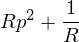

In [7]:
#charakteristicka rovnice a jeji reseni
deqn11=deqn10.subs({N(s):sp.exp(p*s),q:0})
deqn12=deqn11.doit()
eqn3=sp.collect(deqn12,sp.exp(p*s),evaluate=False)
eqn4=eqn3[sp.exp(p*s)]
eqn4

Její řešení je,

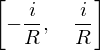

In [8]:
sol3=sp.solve(eqn4,p)
sol3

Dosazením těchto hodnot do $\hat{N}(s)$ za $p$ se dostane obecný tvar homogenní části řešení $N(s)$,

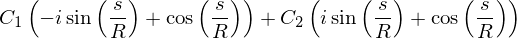

In [9]:
#predpokladany tvar reseni pro N
N0=C_1*sp.expand_complex(sp.exp(sol3[0]*s))+C_2*sp.expand_complex(sp.exp(sol3[1]*s))
N0

Konstanty $C_1$ a $C_2$ jsou obecně komplexní a musí se určit z okrajových podmínek, jinými slovy z úplného uvolnění.

*Partikulární řešení*:

Předpokládaný tvar řešení $\tilde{N}(s)$ se dosadí do diferenciální rovnice pro $N(s)$, ale s nenulovou hodnotou $q$. Tím se dostane rovnice,

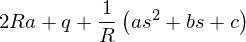

In [10]:
deqn11=deqn10.subs({N(s):a*s**2+b*s+c})
deqn12=deqn11.doit()
deqn12

Srovnáním koeficientů u $s^2$, $s$ a $1$ se dostane soustava rovnic

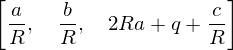

In [11]:
eqn5=sp.collect(sp.expand(deqn12),[s**2,s,1],evaluate=False)
eqn6=[eqn5[s**2],eqn5[s],eqn5[1]]
eqn6

a její řešení,

In [12]:
sol4=sp.linsolve(eqn6,[a,b,c])
sol4

Takže partikulární řešení $\tilde{N}(s)$ má tvar,

In [13]:
a_,b_,c_=next(iter(sol4))
N0p=a_*s**2+b_*s+c_
N0p

*Okrajové podmínky*

K sestavení okrajových podmínek (uvolnění vazeb $A$ a $B$) je nutné znát statickou ekvivalenci liniového zatížení, viz. obrázek výše. Pro výslednici $F_q$ platí,

$$
  F_q=\int_{s_1}^{s_2}q(s)\mathrm{d}s=\int_{-\frac{\varphi_0}{2}}^\frac{\varphi_0}{2}q\cos\varphi R\mathrm{d}\varphi.
$$

Po integraci se pro $F_q$ dostane,

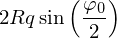

In [14]:
Fq=sp.integrate(q*R*sp.cos(phi),[phi,-phi0/2,phi0/2])
Fq

Okrajové podmínky pro $N(s)$ se mohou napsat následovně,

\begin{eqnarray}
  N_1(s_1) &=& -F_q\sin\frac{\pi}{6}=-2Rq\sin\frac{\pi}{6}\sin\frac{\pi}{6}=-Rq\left( 1-\cos\frac{\pi}{3}\right) \quad\mathrm{pro}\quad s_1=0, \\
  N_1(s_1) &=& N_2(s_2)\quad\mathrm{pro}\quad s_1=\frac{R\pi}{3}\ \mathrm{a}\ s_2=0, \\
  T_1(s_1)=\frac{\mathrm{d}}{\mathrm{d}s_1}N_1(s_1) &=& \frac{\mathrm{d}}{\mathrm{d}s_2}N_2(s_2)=T_2(s_2)\quad\mathrm{pro}\quad s_1=\frac{R\pi}{3}\ \mathrm{a}\ s_2=0, \\
  N_2(s_2) &=& F_A-F_q\cos\left( \frac{\pi}{6}\right) =F_A-2Rq\sin\frac{\pi}{6}\cos\left(\frac{\pi}{6}\right)\quad\mathrm{pro}\quad s_2=\frac{R\pi}{6},  
\end{eqnarray}

druhá a třetí podmínka znamená spojitost normálových a smykových vnitřních účinků na rozhraní úseků $1$ a $2$ a kde $F_A$ je neznámá síla, která se určí z deformační podmínky,

$$
  w_A=\frac{\partial W}{\partial F_A}=0,
$$

kde $w_A$ je průhyb ve směru síly $F_A$ a $W$ je deformační potenciální energie prutu. Výše napsané okrajové podmínky vedou na soustavu algebraických rovnic,

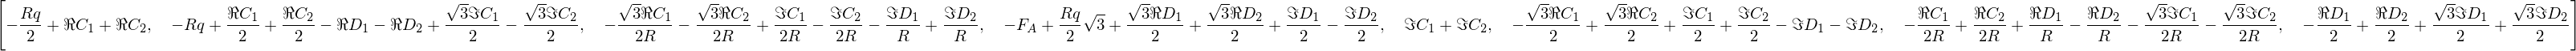

In [15]:
#sestaveni okrajovych podminek
N1=N0+N0p
dN1=N1.diff(s)
N2=N0.subs({C_1:D_1,C_2:D_2})
dN2=N2.diff(s)
bc=[sp.re(N1.subs(s,0)+Fq.subs(phi0,sp.pi/3)*sp.sin(sp.pi/6)), \
    sp.re(N1.subs(s,R*sp.pi/3)-N2.subs(s,0)), \
    sp.re(dN1.subs(s,R*sp.pi/3)-dN2.subs(s,0)), \
    sp.re(N2.subs(s,R*sp.pi/6)-F_A+Fq.subs(phi0,sp.pi/3)*sp.cos(sp.pi/6)), 
    sp.im(N1.subs(s,0)+Fq.subs(phi0,sp.pi/3)*sp.sin(sp.pi/6)), \
    sp.im(N1.subs(s,R*sp.pi/3)-N2.subs(s,0)), \
    sp.im(dN1.subs(s,R*sp.pi/3)-dN2.subs(s,0)), \
    sp.im(N2.subs(s,R*sp.pi/6)-F_A+Fq.subs(phi0,sp.pi/3)*sp.cos(sp.pi/6))]
bc  

Jejich řešením jsou veličiny $\Re{C_1}$, $\Im{C_1}$, $\Re{C_2}$, $\Im{C_2}$, $\Re{D_1}$, $\Im{D_1}$, $\Re{D_2}$ a $\Im{D_2}$,

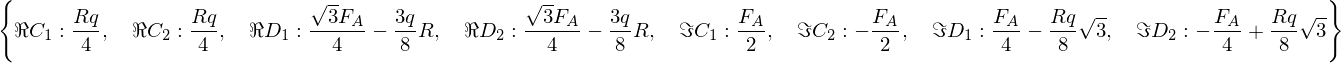

In [16]:
#a jejich reseni vcetne reseni pro N
sol4=sp.solve(bc,[sp.re(C_1),sp.im(C_1),sp.re(C_2),sp.im(C_2),sp.re(D_1),sp.im(D_1),sp.re(D_2),sp.im(D_2)])
sol4

Po jejich dosazení zpět do $N_1(s)$ a $N_2(s)$ se dostane,

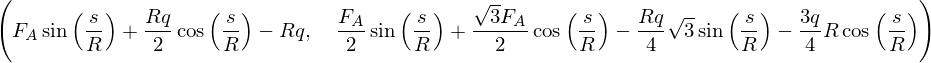

In [17]:
N1_solved=N1.subs({C_1:sol4[sp.re(C_1)]+sp.I*sol4[sp.im(C_1)],C_2:sol4[sp.re(C_2)]+sp.I*sol4[sp.im(C_2)]})
N2_solved=N2.subs({D_1:sol4[sp.re(D_1)]+sp.I*sol4[sp.im(D_1)],D_2:sol4[sp.re(D_2)]+sp.I*sol4[sp.im(D_2)]})
N1=sp.expand(N1_solved)
N2=sp.expand(N2_solved)
N1,N2

Pro $T_1(s)$ a $T_2(s)$ platí,

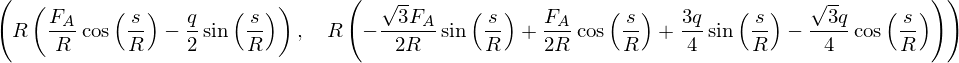

In [18]:
#vysledne reseni pro T
T1=R*N1.diff(s)
T2=R*N2.diff(s)
T1,T2

Pro momenty $M_1(s)$ a $M_2(s)$ na základě výše uvedených Schwedlerových vztahů platí,

$$
  M_1(s)=\int T_1(s)\mathrm{d}s+C_3,\qquad M_2(s)=\int T_2(s)\mathrm{d}s+D_3,
$$

kde $C_3$ a $D_3$ jsou reálné konstanty, které se určí z okrajových podmínek,

\begin{eqnarray}
  M_1(s_1) &=& 0 \quad\mathrm{pro}\quad s_1=0, \\
  M_1(s_1) &=& M_2(s_2) \quad \mathrm{pro}\quad s_1=\frac{R\pi}{3}\ \mathrm{a}\ s_2=0.
\end{eqnarray}  

Výše uvedené okrajové podmínky pro momenty $M_1(s)$ a $M_2(s)$ vedou na soustavu algebraických rovnic,

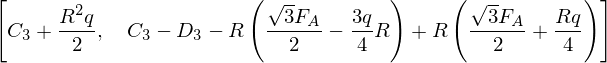

In [19]:
#okrajove podminky pro M1 a M2
M1=sp.integrate(T1,s)+C_3
M2=sp.integrate(T2,s)+D_3
bc=[M1.subs(s,0),M1.subs(s,R*sp.pi/3)-M2.subs(s,0)]
bc

Řešení předchozí soustavy,

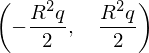

In [20]:
sol5=sp.linsolve(bc,[C_3,D_3])
C_3_solved,D_3_solved=next(iter(sol5))
C_3_solved,D_3_solved

Pro $M_1(s)$ a $M_2(s)$ pak platí,

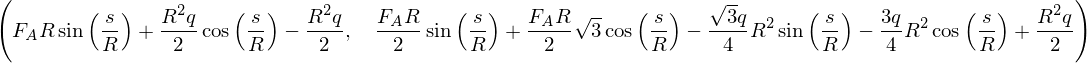

In [21]:
M1=sp.expand(M1.subs(C_3,C_3_solved))
M2=sp.expand(M2.subs(D_3,D_3_solved))
M1,M2

Konečný tvar výsledných vnitřních účinků pro $\theta=s/R$ je následující,

Normálové složky $N_1(\theta_1)$ a $N_2(\theta_2)$, kde $\theta_1\in[0,\pi/3]$ a $\theta_2\in[0,\pi/6]$,

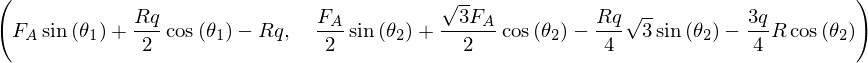

In [22]:
N1t=N1.subs(s,theta_1*R)
N2t=N2.subs(s,theta_2*R)
N1t,N2t

Smykové složky $T_1(\theta_1)$ a $T_2(\theta_2)$, kde $\theta_1\in[0,\pi/3]$ a $\theta_2\in[0,\pi/6]$,

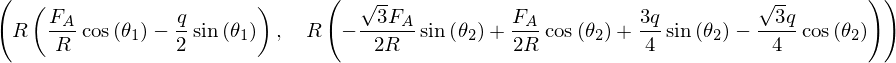

In [23]:
T1t=T1.subs(s,theta_1*R)
T2t=T2.subs(s,theta_2*R)
T1t,T2t

Momentové složky $M_1(\theta_1)$ a $M_2(\theta_2)$, kde $\theta_1\in[0,\pi/3]$ a $\theta_2\in[0,\pi/6]$,

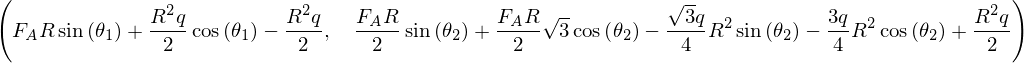

In [24]:
M1t=M1.subs(s,theta_1*R)
M2t=M2.subs(s,theta_2*R)
M1t,M2t

*Odstranění statické neurčitosti*:

Odstranění statické neurčitosti vede na vyřešení deformační podmínky,

$$
  w_A=\frac{\partial W}{\partial F_A}=\int_{0}^{\pi/3}\frac{M_1(\theta_1)}{EJ}\frac{\partial M_1(\theta_1)}{\partial F_A}R\mathrm{d}\theta_1+\int_{0}^{\pi/6}\frac{M_2(\theta_2)}{EJ}\frac{\partial M_2(\theta_2)}{\partial F_A}R\mathrm{d}\theta_2=0.
$$
 
Pomocí *sympy* se tato rovnice jednoduše vyjádří následovně,

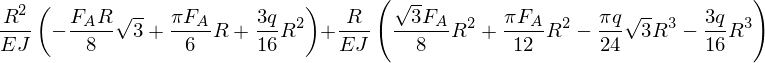

In [25]:
dM1tdF_A=M1t.diff(F_A)
dM2tdF_A=M2t.diff(F_A)
eqn=sp.integrate(M1t/E/J*dM1tdF_A*R,(theta_1,0,sp.pi/3))+sp.integrate(M2t/E/J*dM2tdF_A*R,(theta_2,0,sp.pi/6))
eqn

Jde o nikterak složitou linární rovnici o jedné neznámé $F_A$. Její řešení je následující,

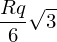

In [26]:
sol6=sp.solveset(eqn,F_A)
F_A_solved=sp.collect(next(iter(sol6)),R*q)
F_A_solved

Dosazením zadaných hodnot pro $R$ a $q$ se vnitřní účinky mohou vykreslit,

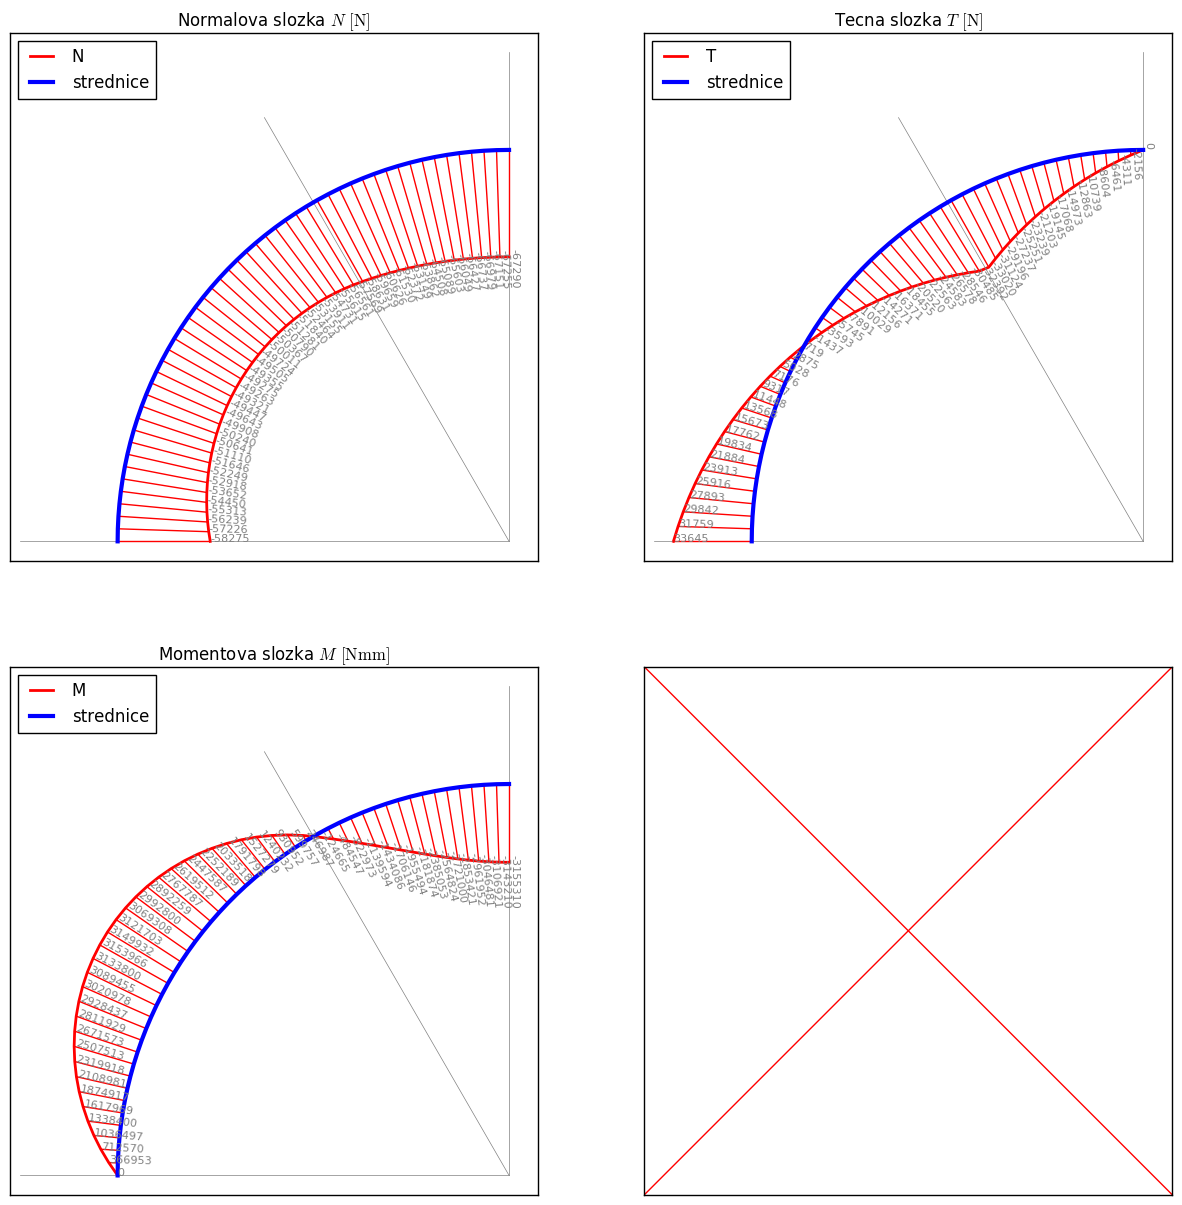

In [27]:
#vykreselni vnitrnich ucinku
#jejich vycisleni
bodu=50
meritko=5.
theta_=np.pi/3.
R_=350
q_=333

theta=np.linspace(0,np.pi/2.,bodu)

strednice_x=[-np.cos(ii) for ii in theta]
strednice_y=[np.sin(ii) for ii in theta]

grid_x=[[0,0],[0,-(1+1/(meritko-1))*np.cos(np.pi/3.)],[0,(-1-1/(meritko-1))]]
grid_y=[[0,(1+1/(meritko-1))],[0,(1+1/(meritko-1))*np.sin(np.pi/3.)],[0,0]]

N_plot=[float(N1t.subs({theta_1:ii,F_A:F_A_solved,R:R_,q:q_})) if ii<theta_ \
        else float(N2t.subs({theta_2:ii-theta_,F_A:F_A_solved,R:R_,q:q_})) for ii in theta]
N_plot_max=abs(max(N_plot))
N_plot_x=[(N_plot[ii]/meritko/N_plot_max+1)*strednice_x[ii] for ii in range(bodu)]
N_plot_y=[(N_plot[ii]/meritko/N_plot_max+1)*strednice_y[ii] for ii in range(bodu)]

T_plot=[float(T1t.subs({theta_1:ii,F_A:F_A_solved,R:R_,q:q_})) if ii<theta_ \
        else float(T2t.subs({theta_2:ii-theta_,F_A:F_A_solved,R:R_,q:q_})) for ii in theta]
T_plot_max=abs(max(T_plot))
T_plot_x=[(T_plot[ii]/meritko/T_plot_max+1)*strednice_x[ii] for ii in range(bodu)]
T_plot_y=[(T_plot[ii]/meritko/T_plot_max+1)*strednice_y[ii] for ii in range(bodu)]

M_plot=[float(M1t.subs({theta_1:ii,F_A:F_A_solved,R:R_,q:q_})) if ii<theta_ \
        else float(M2t.subs({theta_2:ii-theta_,F_A:F_A_solved,R:R_,q:q_})) for ii in theta]
M_plot_max=abs(max(M_plot))
M_plot_x=[(M_plot[ii]/meritko/M_plot_max+1)*strednice_x[ii] for ii in range(bodu)]
M_plot_y=[(M_plot[ii]/meritko/M_plot_max+1)*strednice_y[ii] for ii in range(bodu)]

#vykresleni
fig,axs=plt.subplots(2,2,figsize=(15,15))

ax=axs[0,0]
ax.axis("equal")
ax.tick_params(
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    left='off',
    right='off',
    labelleft='off') # labels along the bottom edge are off
ax.set_ylim(-0.05,1.3)
ax.set_title('Normalova slozka $N$ '+r'$[\mathrm{N}]$')
ax.plot(N_plot_x,N_plot_y,color="red",label='N',lw=2)
for ii in grid_x:
  ax.plot(ii,grid_y[grid_x.index(ii)],color="grey",lw=0.5)
for ii in range(bodu):
  pointx=[strednice_x[ii],N_plot_x[ii]]
  pointy=[strednice_y[ii],N_plot_y[ii]]
  ax.plot(pointx,pointy,color="red",lw=1)
  ax.text(pointx[1],pointy[1],str(int(N_plot[ii])), \
          horizontalalignment="left",fontsize=8,color="grey", \
          rotation=(-180.*theta[ii]/np.pi))
ax.plot(strednice_x,strednice_y,color="blue",label="strednice",lw=3)
ax.legend(loc='upper left')

ax=axs[0,1]
ax.axis("equal")
ax.tick_params(
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    left='off',
    right='off',
    labelleft='off') # labels along the bottom edge are off
ax.set_ylim(-0.05,1.3)
ax.set_title('Tecna slozka $T$ '+r'$[\mathrm{N}]$')
ax.plot(T_plot_x,T_plot_y,color="red",label='T',lw=2)
for ii in grid_x:
  ax.plot(ii,grid_y[grid_x.index(ii)],color="grey",lw=0.5)
for ii in range(bodu):
  pointx=[strednice_x[ii],T_plot_x[ii]]
  pointy=[strednice_y[ii],T_plot_y[ii]]
  ax.plot(pointx,pointy,color="red",lw=1)
  ax.text(pointx[1],pointy[1],str(int(T_plot[ii])), \
          horizontalalignment="left",fontsize=8,color="grey", \
          rotation=(-180.*theta[ii]/np.pi))
ax.plot(strednice_x,strednice_y,color="blue",label="strednice",lw=3)
ax.legend(loc='upper left')

ax=axs[1,0]
ax.axis("equal")
ax.tick_params(
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    left='off',
    right='off',
    labelleft='off') # labels along the bottom edge are off
ax.set_ylim(-0.05,1.3)
ax.set_title('Momentova slozka $M$ '+r'$[\mathrm{Nmm}]$')
ax.plot(M_plot_x,M_plot_y,color="red",label='M',lw=2)
for ii in grid_x:
  ax.plot(ii,grid_y[grid_x.index(ii)],color="grey",lw=0.5)
for ii in range(bodu):
  pointx=[strednice_x[ii],M_plot_x[ii]]
  pointy=[strednice_y[ii],M_plot_y[ii]]
  ax.plot(pointx,pointy,color="red",lw=1)
  ax.text(pointx[1],pointy[1],str(int(M_plot[ii])), \
          horizontalalignment="left",fontsize=8,color="grey", \
          rotation=(-180.*theta[ii]/np.pi))
ax.plot(strednice_x,strednice_y,color="blue",label="strednice",lw=3)
ax.legend(loc='upper left')

ax=axs[1,1]
ax.axis("equal")
ax.tick_params(
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    left='off',
    right='off',
    labelleft='off') # labels along the bottom edge are off
ax.plot([0,1],[0,1],color="red")
ax.plot([0,1],[1,0],color="red")

*Kontrola mezního stavu pružnosti*

Poslední část příkladu se věnuje meznímu stavu pružnosti prutu. Jednotlivé složky napětí  v libovolném bodě příčného průřezu se spočítají podle vztahů,

\begin{eqnarray}
  \sigma^N_{s} &=& \frac{N}{S}, \\
  \tau_{sz}	&=&	\frac{6T}{bh^{3}}\left(\frac{h^{2}}{4}-z^{2}\right), \\
  \sigma^M_{s} &=& \frac{M}{J_{y}}z,
\end{eqnarray}

kde $S$ je plocha průřezu a $J_y$ je kvadratický moment průřezu,

$$
  J_y=\frac{1}{12}bh^3.
$$

Druhý z výše napsaných vztahů je vztah *Žuravského* pro obdélníkový příčný průřez. Jednotlivé průběhy napětí v příčném průřezu pro $\theta=\pi/4$ se mohou pomocí knihovny *matplotlib* vykreslit následovně,

*Vykreslení rozložení napětí v příčných průřezech*

*Poznámka*: šedý obdélník značí příčný průřez a polohu nulových hodnot vnitřních účinků.

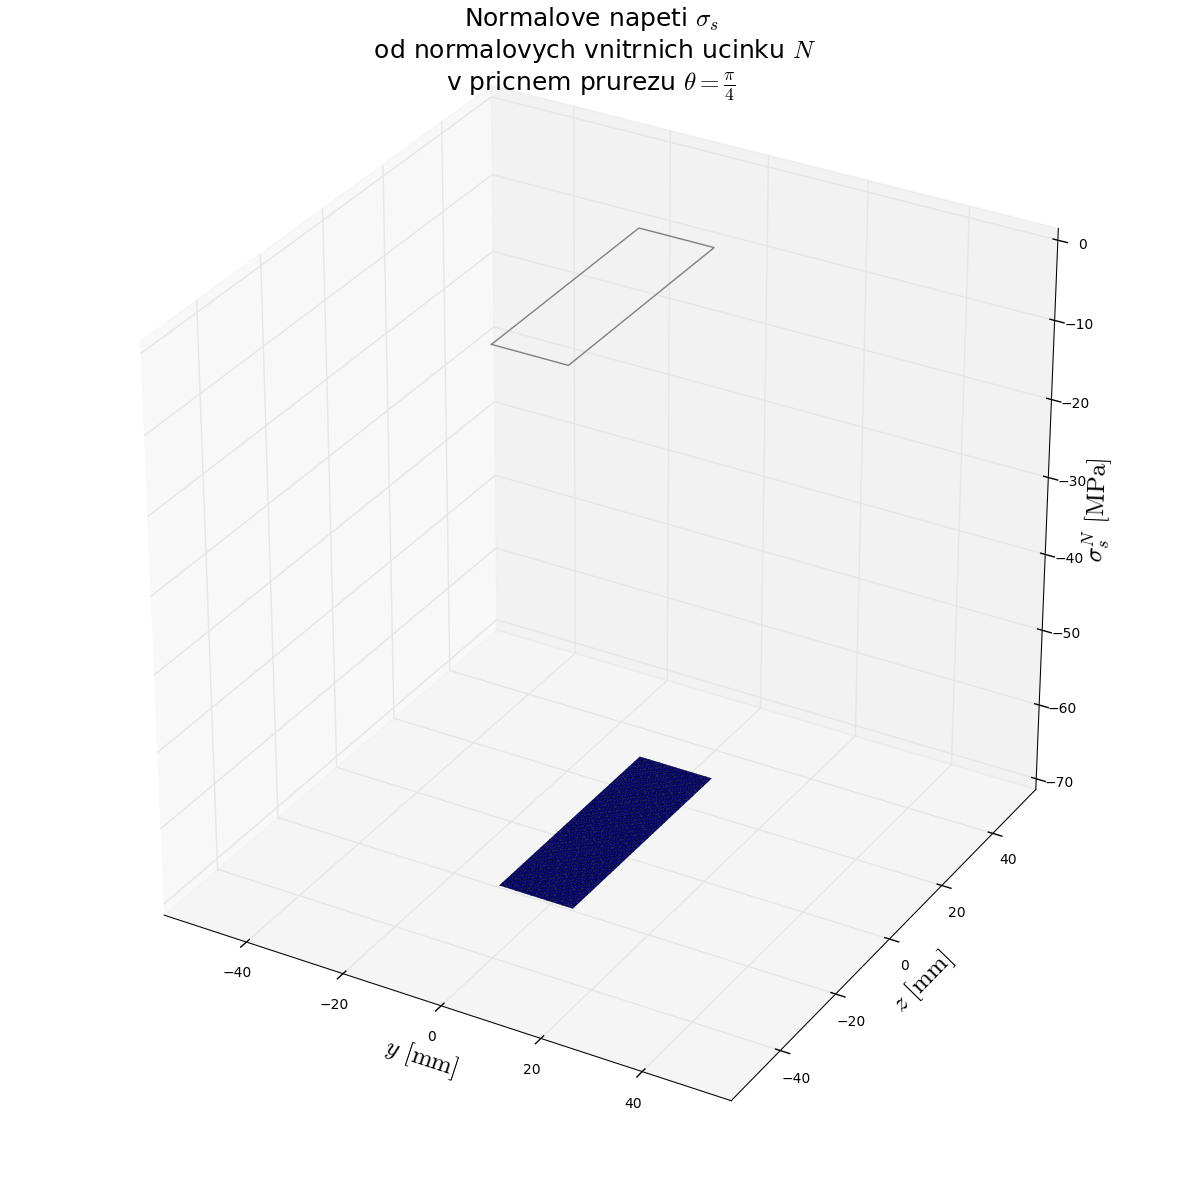

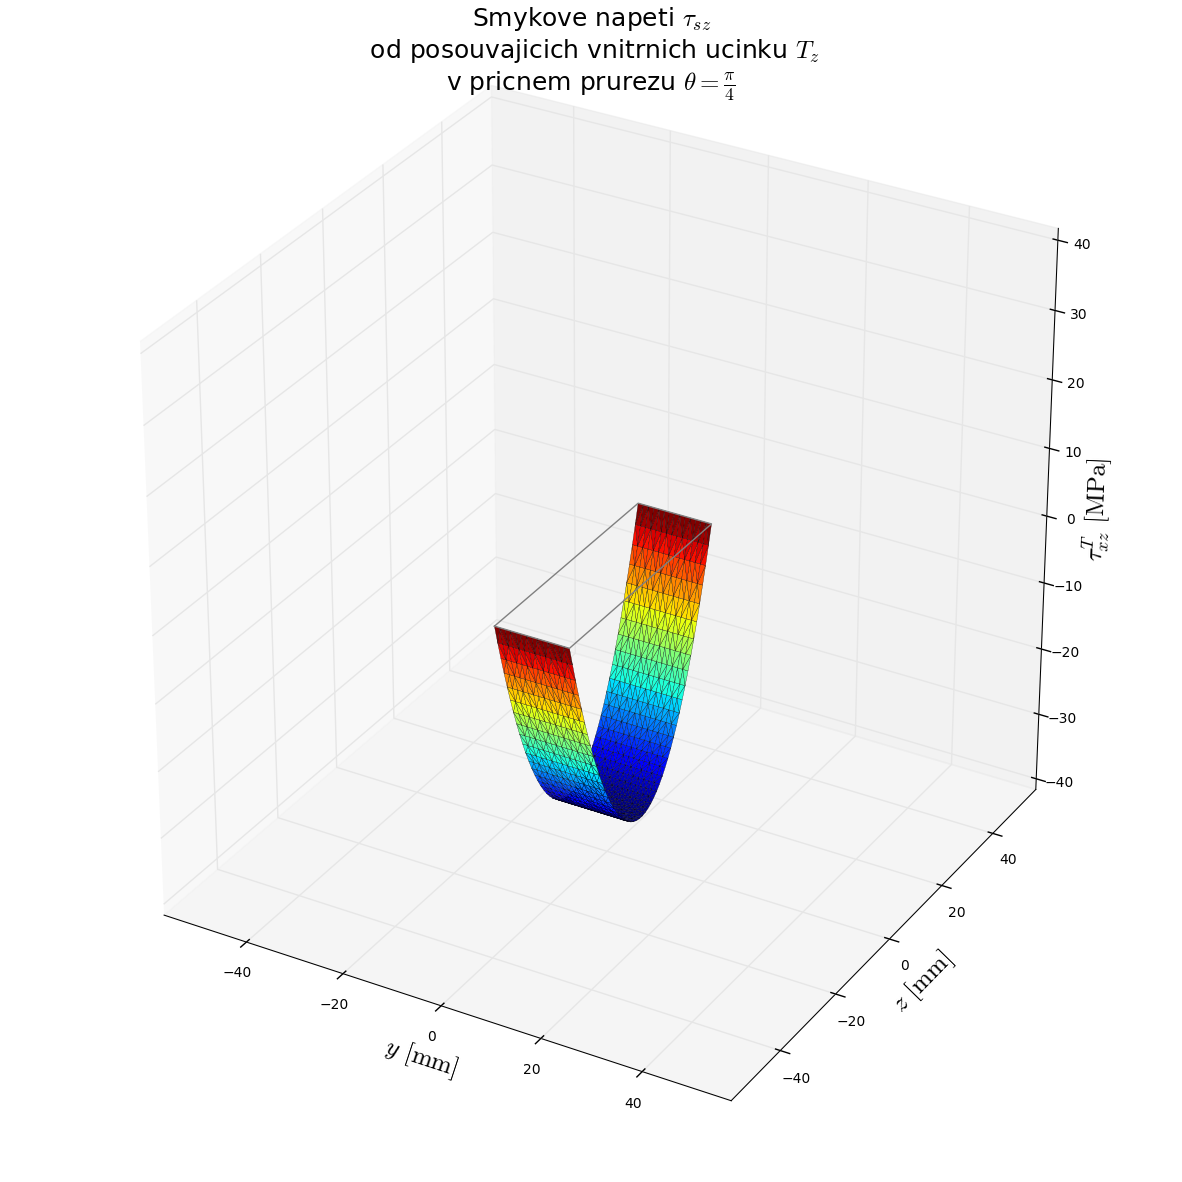

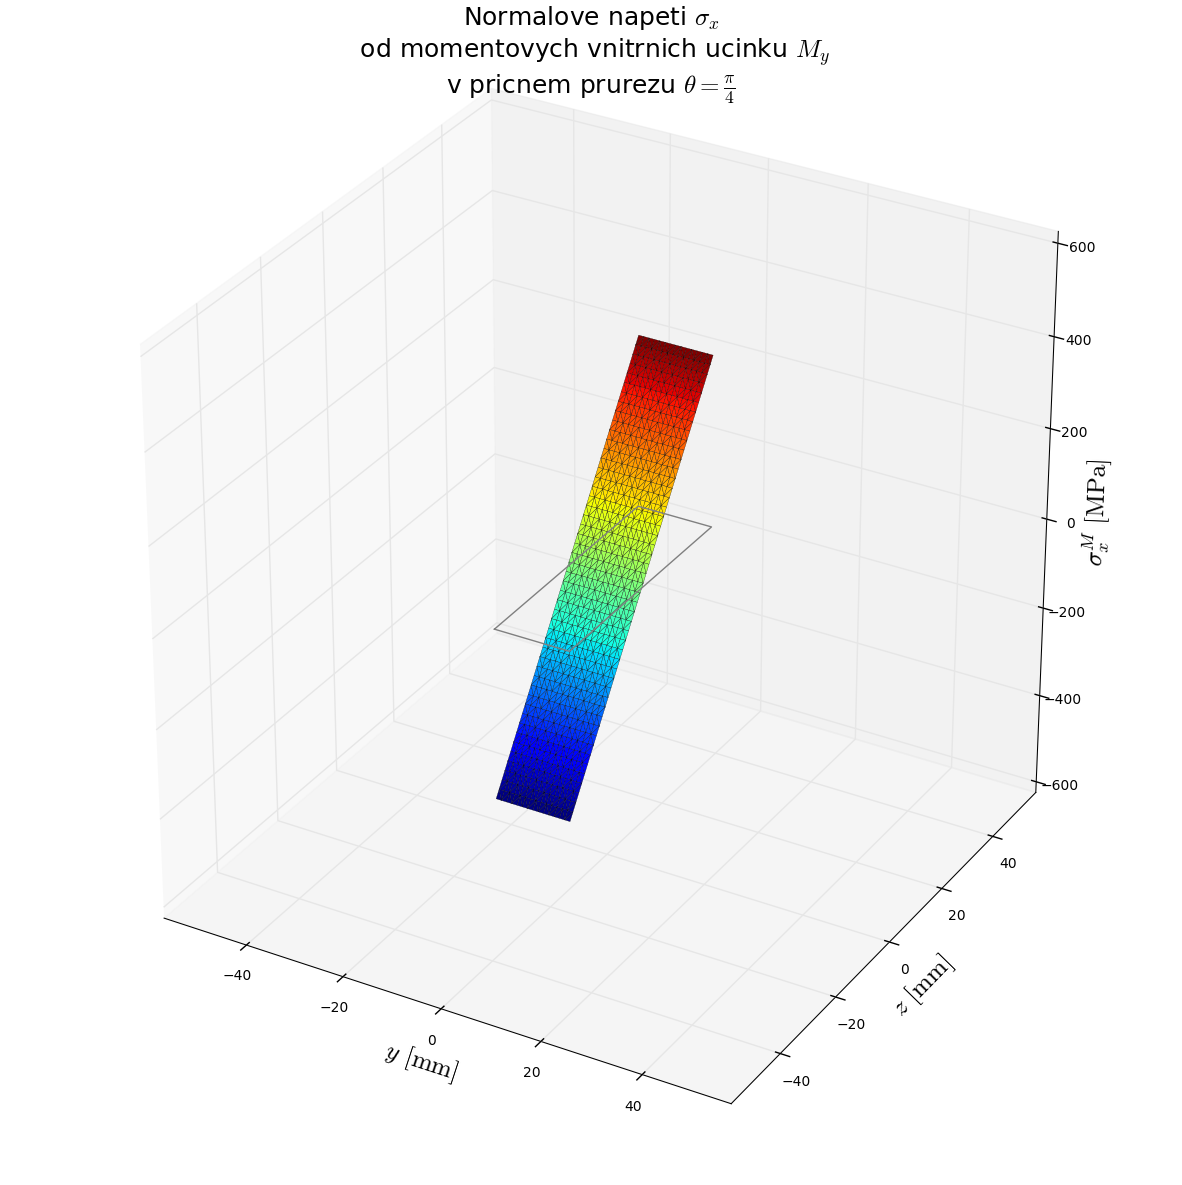

In [28]:
b,h=15,50

#vykresleni rozlozeni napeti
#sx - N
x,y,z=[],[],[]
for ii in np.linspace(-b/2.,b/2.,15): 
  for jj in np.linspace(-h/2.,h/2.,50):
    x.append(ii)
    y.append(jj)
    z.append(float(N1t.subs({theta_1:np.pi/4.,F_A:F_A_solved,R:R_,q:q_}))/b/h)
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
ax.set_xlim3d(-1.1*h,1.1*h)
ax.set_ylim3d(-1.1*h,1.1*h)
#ax.set_zlim3d(-150,150)
ax.set_xlabel('$y$'+' '+r'$[\mathrm{mm}]$').set_fontsize(18)
ax.set_ylabel('$z$'+' '+r'$[\mathrm{mm}]$').set_fontsize(18)
ax.set_zlabel('$\sigma^N_s$'+' '+r'$[\mathrm{MPa}]$').set_fontsize(18)
ax.set_title('Normalove napeti $\sigma_s$\n od normalovych vnitrnich ucinku '+r'$N$' \
             +'\nv pricnem prurezu '+r'$\theta=\frac{\pi}{4}$').set_fontsize(18)
ax.plot([-b/2,-b/2,b/2,b/2,-b/2],[-h/2,h/2,h/2,-h/2,-h/2],color='grey')
ax.plot_trisurf(x, y, z, cmap=cm.jet, linewidth=0.2)

#txz - T
x,y,z=[],[],[]
meze_z=(-40,40)
for ii in np.linspace(-b/2,b/2,15): 
  for jj in np.linspace(-h/2,h/2,50):
    x.append(ii)
    y.append(jj)
    z.append(6*float(T1t.subs({theta_1:np.pi/4.,F_A:F_A_solved,R:R_,q:q_}))/b/h**3*(h**2/4-jj**2)) #tzv. Zuravskeho vzorec pro obdelnik
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
ax.set_xlim3d(-1.1*h,1.1*h)
ax.set_ylim3d(-1.1*h,1.1*h)
ax.set_zlim3d(meze_z[0],meze_z[1])
ax.set_xlabel('$y$'+' '+r'$[\mathrm{mm}]$').set_fontsize(18)
ax.set_ylabel('$z$'+' '+r'$[\mathrm{mm}]$').set_fontsize(18)
ax.set_zlabel(r'$\tau^T_{xz}$'+' '+r'$[\mathrm{MPa}]$').set_fontsize(18)
ax.set_title('Smykove napeti '+r'$\tau_{sz}$'+'\n od posouvajicich vnitrnich ucinku '+r'$T_z$' \
             +'\nv pricnem prurezu '+r'$\theta=\frac{\pi}{4}$').set_fontsize(18)
ax.plot([-b/2,-b/2,b/2,b/2,-b/2],[-h/2,h/2,h/2,-h/2,-h/2],color='grey')
ax.plot_trisurf(x, y, z, cmap=cm.jet, linewidth=0.2)

#sx - M
x,y,z=[],[],[]
meze_z=(-600,600)
J_=1./12.*b*h**3 #<- kvadraticky moment plochy
for ii in np.linspace(-b/2,b/2,15): 
  for jj in np.linspace(-h/2,h/2,50):
    x.append(ii)
    y.append(jj)
    z.append(float(M1t.subs({theta_1:np.pi/4.,F_A:F_A_solved,R:R_,q:q_}))/J_*jj) 
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
ax.set_xlim3d(-1.1*h,1.1*h)
ax.set_ylim3d(-1.1*h,1.1*h)
ax.set_zlim3d(meze_z[0],meze_z[1])
ax.set_xlabel('$y$'+' '+r'$[\mathrm{mm}]$').set_fontsize(18)
ax.set_ylabel('$z$'+' '+r'$[\mathrm{mm}]$').set_fontsize(18)
ax.set_zlabel('$\sigma^M_x$'+' '+r'$[\mathrm{MPa}]$').set_fontsize(18)
ax.set_title('Normalove napeti $\sigma_x$\n od momentovych vnitrnich ucinku '+r'$M_y$' \
             +'\nv pricnem prurezu '+r'$\theta=\frac{\pi}{4}$').set_fontsize(18)
ax.plot([-b/2,-b/2,b/2,b/2,-b/2],[-h/2,h/2,h/2,-h/2,-h/2],color='grey')
ax.plot_trisurf(x, y, z, cmap=cm.jet, linewidth=0.2)

Z průběhů vnitřních účinků nejde poznat, který příčný průřez je kritický, proto si vykreslíme průběhý maximálích tahových, případně redukovaných napětí podél celé středice prutu.

V krajních vláknech příčného průřezu, tj. pro $z=\pm h/2$, je normálové napětí superozicí napětí od účinků $N(s)$ a $M(s)$,

$$
  \sigma_{s,max}=\frac{N(s)}{S}\pm\frac{M(s)}{W_{o}},
$$

kde

$$
  S=bh\quad a\quad W_{o}=\frac{1}{6}bh^2.
$$

Na střednici prutu studovaného příčného průřezu, tj. pro $z=0$, je superozice normálového napětí od složky vnitřních účinků $N(s)$ a smykového napětí od složky vnitřních účinků $T(s)$. Redukované napětí se vyjádří podle *Trescovy* teorie,

$$
  \sigma_{red}=\sqrt{\left(\sigma_s^N\right)^2+4\left(\tau_{sz}^T\right)^2}=\sqrt{\left(\frac{N(s)}{S}\right)^2+4\left(\frac{3T(s)}{2S}\right)^{2}}.
$$ 

In [29]:
S=b*h
Wo=1./6.*b*h**2
s_max_plus=N1t/S+M1t/Wo
s_max_minus=N1t/S-M1t/Wo
s_red=sp.sqrt((N1t/S)**2+4*(3*T1t/2/S)**2)

Vykreslení průběhu maximálních a redukovaných napětí podél střednice. Není nutné průběhy vykreslovat na zakřivené střednici, dokonce i v případě vnitřních účinků je to zbytečné a možná i matouci, protože člověk prostě křivočaře neuvažuje,

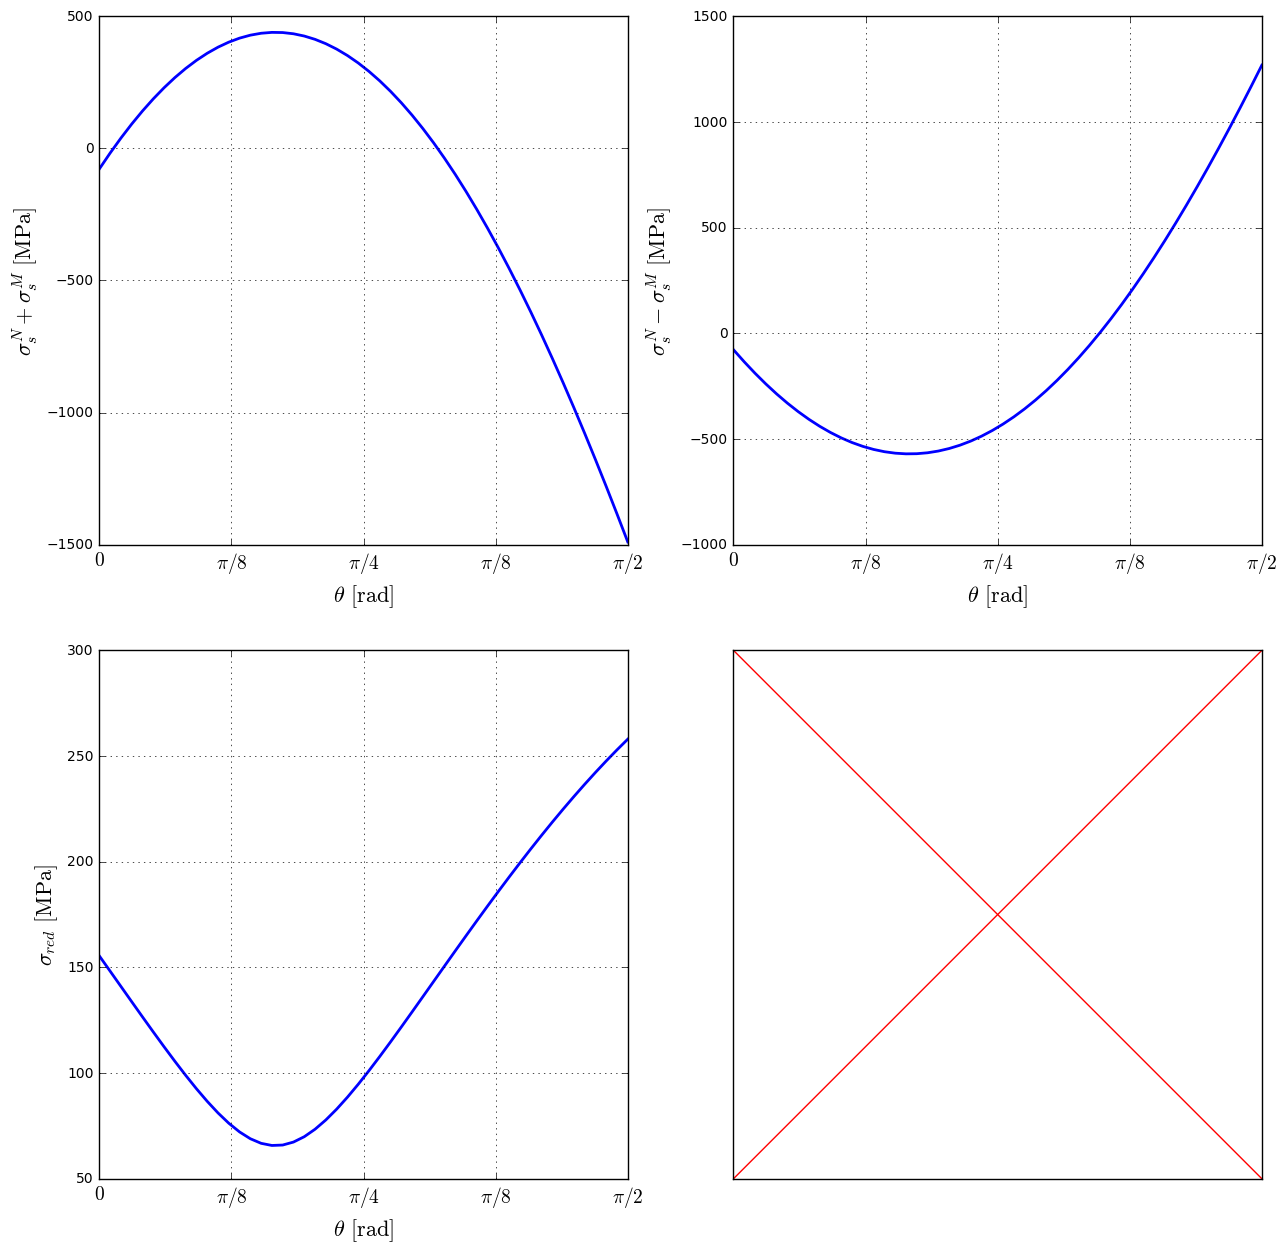

In [30]:
s_max_plus_plot=[float(s_max_plus.subs({theta_1:ii,F_A:F_A_solved,R:R_,q:q_})) for ii in theta]
s_max_minus_plot=[float(s_max_minus.subs({theta_1:ii,F_A:F_A_solved,R:R_,q:q_})) for ii in theta]
s_red_plot=[float(s_red.subs({theta_1:ii,F_A:F_A_solved,R:R_,q:q_})) for ii in theta]

fig,axs=plt.subplots(2,2,figsize=(15,15))

ax=axs[0,0]
ax.set_xticks((0.,np.pi/8,np.pi/4,3*np.pi/8,np.pi/2))
ax.set_xticklabels((r'$0$',r'$\pi/8$',r'$\pi/4$',r'$\pi/8$',r'$\pi/2$'),fontsize=14)
ax.set_xlabel(r'$\theta$'+' $\mathrm{[rad]}$').set_fontsize(16)
ax.set_ylabel(r'$\sigma_s^N+\sigma_s^M$'+' $\mathrm{[MPa]}$').set_fontsize(16)
ax.grid()
ax.plot(theta,s_max_plus_plot,lw=2)

ax=axs[0,1]
ax.set_xticks((0.,np.pi/8,np.pi/4,3*np.pi/8,np.pi/2))
ax.set_xticklabels((r'$0$',r'$\pi/8$',r'$\pi/4$',r'$\pi/8$',r'$\pi/2$'),fontsize=14)
ax.set_xlabel(r'$\theta$'+' $\mathrm{[rad]}$').set_fontsize(16)
ax.set_ylabel(r'$\sigma_s^N-\sigma_s^M$'+' $\mathrm{[MPa]}$').set_fontsize(16)
ax.grid()
ax.plot(theta,s_max_minus_plot,lw=2)

ax=axs[1,0]
ax.set_xticks((0.,np.pi/8,np.pi/4,3*np.pi/8,np.pi/2))
ax.set_xticklabels((r'$0$',r'$\pi/8$',r'$\pi/4$',r'$\pi/8$',r'$\pi/2$'),fontsize=14)
ax.set_xlabel(r'$\theta$'+' $\mathrm{[rad]}$').set_fontsize(16)
ax.set_ylabel(r'$\sigma_{red}$'+' $\mathrm{[MPa]}$').set_fontsize(16)
ax.grid()
ax.plot(theta,s_red_plot,lw=2)

ax=axs[1,1]
ax.axis("equal")
ax.tick_params(
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    left='off',
    right='off',
    labelleft='off') # labels along the bottom edge are off
ax.plot([0,1],[0,1],color="red")
ax.plot([0,1],[1,0],color="red")

Z obrázků jeden nahlédne, že extrémní napětí jsou v příčném průřezu $\pi/2$ a to tlaková pro případ superpozice normálových napětí $\sigma_s^N+\sigma_s^M$ a tahová pro případ superpozice $\sigma_s^N-\sigma_s^M$. Protože se předpokládá, že mez kluzu použitého materiálu je je stejná jak v tlaku, taki v tahu, bezpečnost se určí podle vztahu,

$$
  k=\frac{\sigma_k}{\sigma_s^N+\sigma_s^M}.
$$

Takže,

In [31]:
sk=350
k=np.abs(float(sk/s_max_plus.subs({theta_1:ii,F_A:F_A_solved,R:R_,q:q_})))
k

Bezpečnost je naprosto nedostatečná, proto je nutné provést korekce v návrhu prutu.

*Úkol*: Modifikujte materiál prutu případně jeho příčný průřez tak, aby splnil podmínku mezního stavu pružnosti!! 